In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# CSV file with stock data
df = pd.read_csv('/content/drive/My Drive/PEBO.csv')

# Display the first few rows of the dataframe
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-24,30.870001,30.900000,30.600000,30.830000,29.111229,96000
1,2023-02-27,30.850000,31.120001,30.750000,30.990000,29.262306,110100
2,2023-02-28,31.030001,31.230000,30.969999,31.110001,29.375618,164100
3,2023-03-01,31.000000,31.360001,30.850000,31.290001,29.545586,140500
4,2023-03-02,31.090000,31.260000,30.920000,31.230000,29.488928,142000


In [4]:

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2024-02-16,28.879999,29.330000,28.200001,28.950001,28.950001,115400
247,2024-02-20,28.660000,29.120001,28.510000,28.820000,28.820000,125500
248,2024-02-21,28.680000,29.090000,28.580000,29.040001,29.040001,120300
249,2024-02-22,28.879999,28.969999,28.110001,28.350000,28.350000,108200
250,2024-02-23,28.639999,28.889999,28.190001,28.430000,28.430000,86400


In [7]:
# Select the 'Price' column as the target variable
data = df['Open'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Create sequences for LSTM
sequence_length = 10  # You can adjust this based on your preference
X, y = [], []

for i in range(len(data_normalized) - sequence_length):
    X.append(data_normalized[i:i+sequence_length, 0])
    y.append(data_normalized[i+sequence_length, 0])

X, y = np.array(X), np.array(y)

# Reshape data for LSTM input (batch_size, timesteps, input_dim)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [8]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [9]:
# Define hyperparameters
epochs = 20  # You can adjust this based on your preference
batch_size = 32  # You can adjust this based on your preference

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/20
6/6 [==============================] - 4s 21ms/step - loss: 0.0710
Epoch 2/20
6/6 [==============================] - 0s 17ms/step - loss: 0.0144
Epoch 3/20
6/6 [==============================] - 0s 18ms/step - loss: 0.0152
Epoch 4/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0098
Epoch 5/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0107
Epoch 6/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0087
Epoch 7/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0092
Epoch 8/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0084
Epoch 9/20
6/6 [==============================] - 0s 17ms/step - loss: 0.0086
Epoch 10/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0080
Epoch 11/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0081
Epoch 12/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0080
Epoch 13/20
6/6 [==============================] - 0s 16ms/st

In [10]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform for original scale
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, predictions))
print('Root Mean Squared Error (RMSE):', rmse)

2/2 [==============================] - 1s 14ms/step
Root Mean Squared Error (RMSE): 1.392422654516617


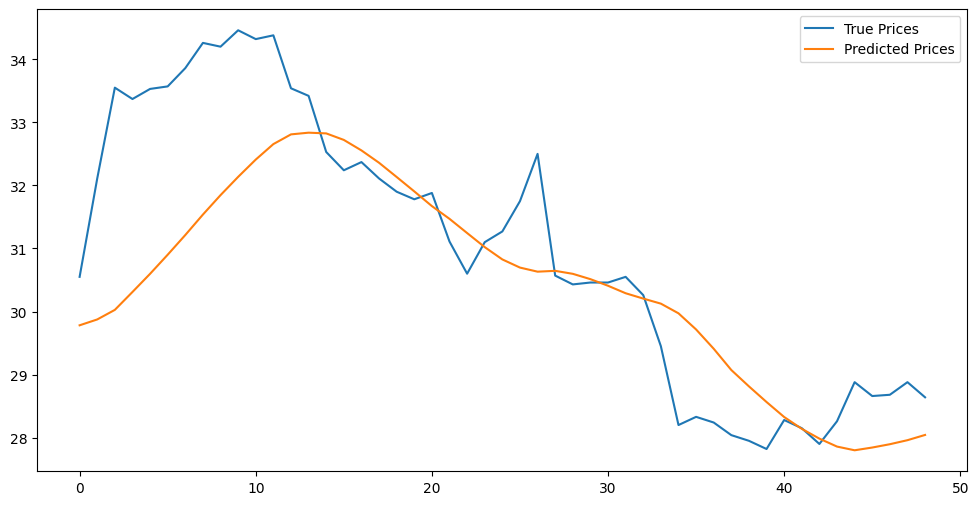

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='True Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()
